In [1]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [2]:
from utils.plot_utils import plot_image_grid

In [3]:
# from dataloaders.MSLANetDataLoader import MSLANetDataLoader
# from shared.constants import IMAGENET_STATISTICS

# dataloader = MSLANetDataLoader(
#     dynamic_load=True,
#     load_synthetic=True,
#     normalize=False,
#     normalization_statistics=IMAGENET_STATISTICS,
#     batch_size=32,
#     upscale_train=False,
#     online_gradcam=False,
# )
# train_dataloader = dataloader.get_train_dataloder()
# batch = next(iter(train_dataloader))
# (image_ori, image_low, image_high), labels = batch
# plot_image_grid(image_ori, "Original Images")
# plot_image_grid(image_low, "Images Low Threshold")
# plot_image_grid(image_high, "Images High Threshold")
# val_dataloader = dataloader.get_val_dataloader()
# batch = next(iter(val_dataloader))
# (image_ori, image_low, image_high), labels = batch
# plot_image_grid(image_ori, "Val Original Images")
# plot_image_grid(image_low, "Val Images Low Threshold")
# plot_image_grid(image_high, "Val Images High Threshold")

Using device: mps
LOADED METADATA HAS LENGTH 10015
---LOADING SYNTHETIC DATA IN THE TRAINING SET---
---TRAIN---: 12650 entries
---VAL---: 1803 entries
---TEST---: 1002 entries
Using device: mps
--Data Balance-- balance_data set to True. Training data will be balanced.
--Data Balance-- The most common class is 0 with 4827 images.
--Data Balance-- The second common class is 1 with 1799 images with a difference of 3028 images from the most common class.
--Data Balance (Downsampling)-- Keeping 4827 from 0 class..
--Data Balance (Downsampling)-- 0 now has 4827 images
--Data Balance (Oversampling)-- Adding 3028 from 1 class..
--Data Balance (Oversampling)-- Adding 3608 from 3 class..
--Data Balance (Oversampling)-- Adding 3033 from 2 class..
--Data Balance (Oversampling)-- Adding 3449 from 4 class..
--Data Balance (Oversampling)-- Adding 4096 from 5 class..
--Data Balance (Oversampling)-- Adding 3925 from 6 class..


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


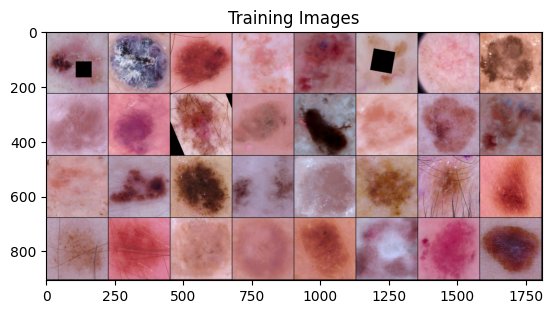

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


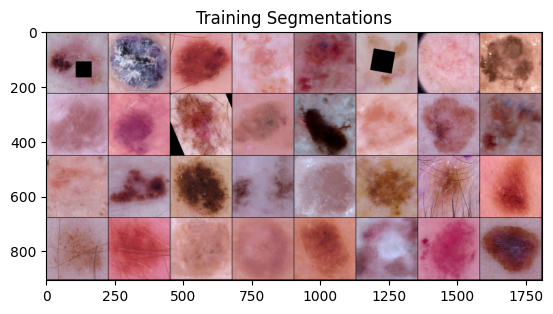

Using device: mps


KeyError: 'train'

In [5]:
from shared.constants import IMAGENET_STATISTICS
from shared.enums import DynamicSegmentationStrategy
from dataloaders.DynamicSegmentationDataLoader import DynamicSegmentationDataLoader
from tqdm.notebook import tqdm

dataloader = DynamicSegmentationDataLoader(
    limit=None,
    dynamic_load=True,
    upscale_train=True,
    segmentation_strategy=DynamicSegmentationStrategy.SAM.value,
    normalize=False,
    normalization_statistics=IMAGENET_STATISTICS,
    batch_size=32,
    keep_background=True,
    load_synthetic=True,
)
train_dataloader = dataloader.get_train_dataloder()
batch = next(iter(train_dataloader))
images, labels = batch
plot_image_grid(images, "Training Images")
plot_image_grid(images, "Training Segmentations")
val_dataloader = dataloader.get_val_dataloader()
batch = next(iter(val_dataloader))
images, labels = batch
plot_image_grid(images, "Validation Images")
plot_image_grid(images, "Validation Segmentations")